In [75]:
import pandas as pd
import numpy as np

df = pd.read_csv('hrdcrolling/preprocessing/final.csv', index_col = 0)
# df.drop('Unnamed: 0', axis=1, inplace=True)
display(df)

from matplotlib import font_manager, rc
font_path = "../data/THEdog.ttf"   #폰트파일의 위치
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

,과정명,학원명,기간,훈련비,정원,취업률,연령대,지역1,지역2,NCS,과정
0,보험사무원(GA총무)양성과정,인컴트랜드평생교육원,42,1161380,20,93.8,36.0,인천,부평구,03_금융보험,보험사무원
1,보험총무사무원,부천여성인력개발센터,40,1106080,20,64.3,34.0,경기,부천시,03_금융보험,보험사무원
2,보험사무원(GA총무)양성과정,인컴트랜드평생교육원,28,1161380,20,93.8,31.0,인천,부평구,03_금융보험,보험사무원
3,보험총무사무원양성,은평여성인력개발센터,40,1106080,18,54.3,36.0,서울,은평구,03_금융보험,보험사무원
4,보험사무원(GA총무)양성과정,인컴트랜드평생교육원,28,1161380,20,93.8,35.0,인천,부평구,03_금융보험,보험사무원
...,...,...,...,...,...,...,...,...,...,...,...
15985,애견미용사심화과정,동물농장애견미용학원,20,802440,12,50.0,NaN,부산,동래구,24_농림어업,애견미용사
15986,[탑강] 유기농업기능사 필기,한국이러닝협회,28,152770,500,20.0,NaN,서울,구로구,24_농림어업,유기농업기능사
15987,[탑강] 유기농업산업기사 필기,한국이러닝협회,49,186500,500,20.0,NaN,서울,구로구,24_농림어업,유기농업산업기사
15988,애견미용사 취업과정,프로펫애완동물관리학원,113,2697530,15,46.9,NaN,강원,원주시,24_농림어업,애견미용사


In [22]:
df_s = df.loc[:,['과정', '취업률']]
df_s = df_s.groupby(by=['과정']).count()
display(df_s)

df1 = df.groupby('과정').count()
c_list = df1.index.tolist()
n_list = df1.과정명.tolist()
count_list = []

for i in range(len(df)):
    for n in range(len(c_list)):
        if df.loc[i]['과정'] in c_list[n]:
            count = n_list[n]
            break;
    count_list.append(count);
    
df['과정수'] = count_list
print(type(df['과정수']))
df['취업자수'] = df['정원'] * df['취업률'] / 100

,취업률
과정,
IoT,20
UI/UX개발자,150
가구제작,23
가죽공예,14
간호조무사,745
...,...
항공정비사,13
헤어디자이너,733
화훼장식전문가,131


<class 'pandas.core.series.Series'>


13


,취업률,연령대
과정,,
건설플랜트,98.000000,25.000000
비파괴검사,80.000000,28.000000
법률취업,76.700000,29.909091
금형,76.300000,27.000000
보안전문가,75.142105,24.434211
응용SW개발자,74.698039,26.235294
디지털퍼블리셔,73.580000,24.200000
융합SW개발자,73.446400,26.056000
수질분석가,73.400000,24.666667


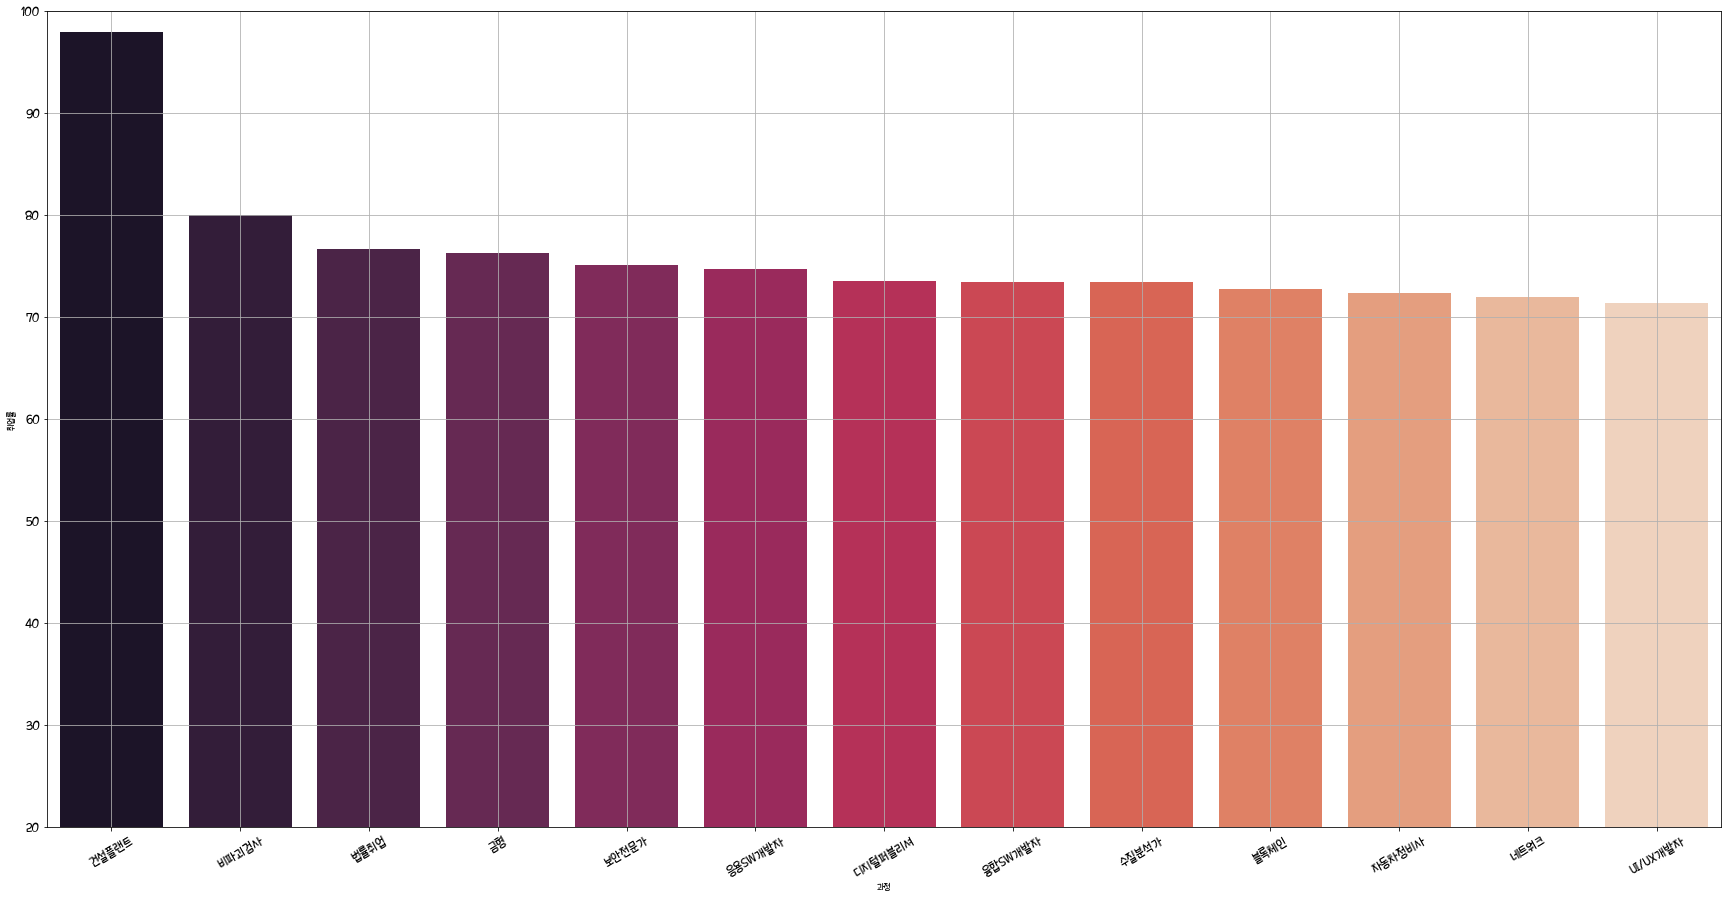

In [96]:
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('hrdcrolling/preprocessing/final.csv', index_col = 0)

df1 = df.loc[:,['NCS', '취업률','과정','연령대']]

# def age_filter(data, age):
#     return 10 < data["연령대"].mean() < age
df1.dropna(subset=['연령대'], inplace=True)
df1 = df1.groupby(["과정"]).mean()
# df1 = df1.reset_index(level=['과정'])
df1.sort_values(by=['취업률'], ascending=True, inplace=True)
df1 = df1.loc[(df1.연령대 < 30) & (df1.연령대 >= 20), :]
df1 = df1.sort_values(by=['취업률'], ascending= False)
df70 = df1['취업률'] >= 70
df1 = df1[df70]
print(len(df1))
display(df1)

# n = int(round(len(df)/2))

# df2 = df.tail(n)

fig = plt.figure(figsize=(30,15))
ax1 = fig.add_subplot(1, 1, 1)
# ax2 = fig.add_subplot(2, 1, 2)

sns.barplot(x=df1.index, y='취업률', data=df1, palette='rocket', ax=ax1)
# sns.barplot(x=df2.index, y='취업률', data=df2, palette='rocket', ax=ax2)
plt.xticks(size=14, rotation=30)
plt.yticks(size=14)
plt.grid(True)
plt.ylim(20, 100)

plt.savefig("20대취업률TOP10-1.png")
plt.show()
plt.close()

top_rate = df1.index.tolist()

C:\Users\wima9\anaconda3\envs\pydatavenv\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\wima9\anaconda3\envs\pydatavenv\lib\site-packages\pandas\core\frame.py:4304: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,과정명,과정수,기간,훈련비,정원,취업률,연령대,지역1,지역2,NCS
과정,,,,,,,,,,
웹퍼블리셔,366,366,366,366,366,366,366,366,366,366
시각디자인,262,262,262,262,262,262,262,262,262,262
기계설계제작,219,219,219,219,219,219,219,219,219,219
네일아트,184,184,184,184,184,184,184,183,183,184
웹&앱개발자,175,175,175,175,175,175,175,172,172,175
영상편집,169,169,169,169,169,169,169,169,169,169
응용SW개발자,149,149,149,149,149,149,149,149,149,149
융합SW개발자,122,122,122,122,122,122,122,121,121,122
헤어디자이너,117,117,117,117,117,117,117,117,117,117


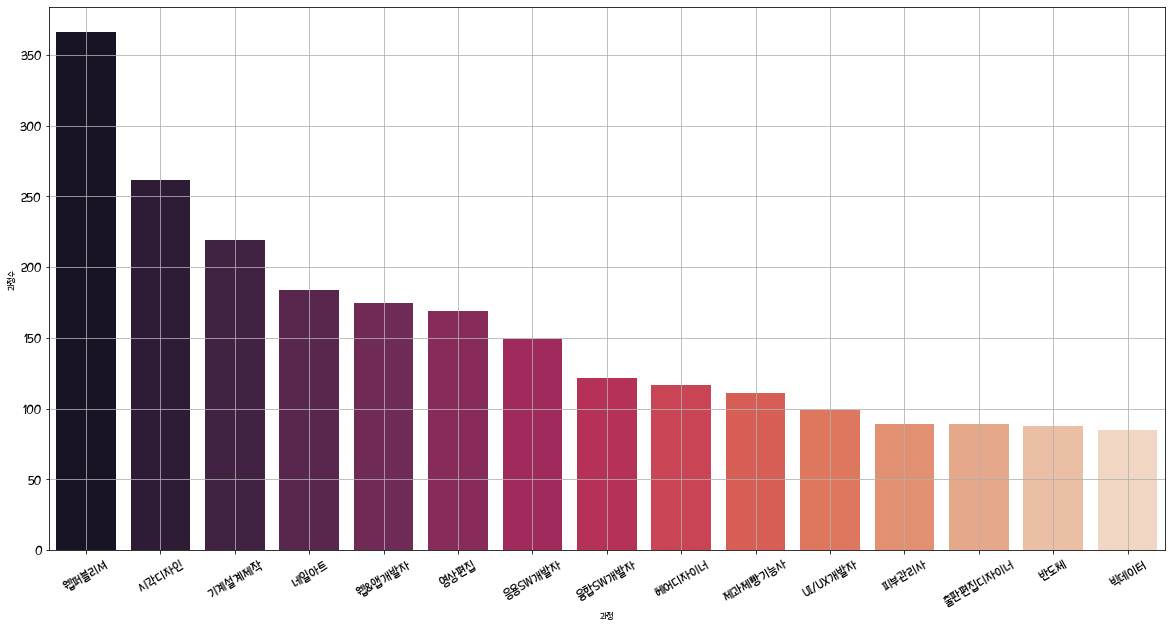

In [95]:
import matplotlib.pyplot as plt
import seaborn as sns

df1 = df.loc[:,['취업률','과정','연령대']]
df1 = df.loc[(df.연령대 < 30) & (df.연령대 >= 20), :]
df1.dropna(subset=['연령대'], inplace=True)
df1.rename(columns = {'학원명' : '과정수'}, inplace = True)
df1 = df1.groupby(["과정"]).count()
df1.sort_values(by='과정수', ascending=False, inplace=True)
df1 = df1.head(15)
display(df1)

# 구역 설정
fig = plt.figure(figsize=(20, 10))
ax1 = fig.add_subplot(1, 1, 1)

# 그래프 그리기
sns.barplot(x=df1.index, y='과정수' ,data=df1, palette="rocket", ax=ax1)
plt.xticks(size=14, rotation=30)
plt.yticks(size=14)
plt.grid(True)


# 출력 
plt.savefig("20대과정수TOP10.png")
plt.show()
plt.close()

top_num = df1.index.tolist()

In [101]:
p_list =[]
t = 0;
print(top_rate)
print(top_num)
for i in range(len(top_rate)):
    if top_rate[i] in top_num:
        t = top_rate[i]
        p_list.append(t)
        break;

print(p_list)

['건설플랜트', '비파괴검사', '법률취업', '금형', '보안전문가', '응용SW개발자', '디지털퍼블리셔', '융합SW개발자', '수질분석가', '블록체인', '자동차정비사', '네트워크', 'UI/UX개발자']
['웹퍼블리셔', '시각디자인', '기계설계제작', '네일아트', '웹&앱개발자', '영상편집', '응용SW개발자', '융합SW개발자', '헤어디자이너', '제과제빵기능사', 'UI/UX개발자', '피부관리사', '출판편집디자이너', '반도체', '빅데이터']
['응용SW개발자']


In [80]:
df1 = df.groupby('과정').count()
df2 = df.groupby('과정').mean()
df2['과정수'] = df1['과정명']
display(df2)
# c_list = df1.index.tolist()
# n_list = df1.과정명.tolist()
# count_list = []

# for i in range(len(df)):
#     for n in range(len(c_list)):
#         if df.loc[i]['과정'] in c_list[n]:
#             count = n_list[n]
#             break;
#     count_list.append(count);
    
# df['과정수'] = count_list
# print(type(df['과정수']))

# df['취업자수'] = df['정원'] * df['취업률'] / 100
# display(df)

,기간,훈련비,정원,취업률,연령대,과정수
과정,,,,,,
IoT,120.550000,7.113213e+06,24.750000,65.250000,27.600000,20
UI/UX개발자,106.873333,5.522356e+06,23.286667,70.084667,26.223301,150
가구제작,128.826087,7.297970e+06,21.652174,66.982609,36.000000,23
가죽공예,19.500000,1.041997e+06,13.142857,25.371429,38.818182,14
간호조무사,216.271141,3.051608e+06,33.922148,75.101074,34.322535,745
...,...,...,...,...,...,...
항공정비사,114.076923,5.200148e+06,27.230769,44.838462,19.615385,13
헤어디자이너,63.975443,2.036911e+06,15.195089,62.822510,34.395028,733
화훼장식전문가,19.900763,1.030733e+06,15.458015,35.362595,32.486726,131


In [82]:
a = df2['연령대'] >= 20
df_20 = df2[a]
b = df_20['연령대'] < 30
df_20 = df_20[b]
df_z = df_20
display(df_z)
# df_z2 = df.groupby(by='과정').sum()
# df_z['과정수'] = df_z2['과정수']
x = df_z['과정수']
np.mean(x)
np.std(x,ddof=1)
z_score = (x - np.mean(x)) / np.std(x,ddof=1)
df_z['z_score'] = z_score
df_z.sort_values(by='z_score', ascending=False, inplace=True)
display(df_z)

,기간,훈련비,정원,취업률,연령대,과정수
과정,,,,,,
IoT,120.550000,7.113213e+06,24.750000,65.250000,27.600000,20
UI/UX개발자,106.873333,5.522356e+06,23.286667,70.084667,26.223301,150
건설플랜트,86.833333,4.922050e+06,30.000000,98.000000,25.000000,6
건축제도기능사,42.708861,1.287447e+06,217.240506,54.587342,29.600000,79
게임개발,132.208333,4.661259e+06,22.902778,54.511111,24.666667,72
게임그래픽,126.522727,4.290579e+06,22.000000,51.115909,23.914286,44
금형,105.000000,5.430600e+06,20.000000,76.300000,27.000000,1
네일아트,58.807588,1.794077e+06,14.674797,58.853388,29.000000,369
네트워크,114.714286,4.905172e+06,23.857143,69.957143,26.250000,14


,기간,훈련비,정원,취업률,연령대,과정수,z_score
과정,,,,,,,
시각디자인,57.898148,1.781781e+06,121.094444,51.824074,29.354545,540,3.363929
웹퍼블리셔,92.212851,3.701190e+06,20.759036,66.288956,25.751807,498,3.049035
네일아트,58.807588,1.794077e+06,14.674797,58.853388,29.000000,369,2.081861
영상편집,63.976271,2.252178e+06,28.542373,49.756949,28.210970,295,1.527048
웹&앱개발자,102.535849,4.951614e+06,107.369811,62.466038,26.960199,265,1.302124
반도체,67.846154,3.342680e+05,500.000000,52.900000,25.694737,195,0.777301
응용SW개발자,124.417989,6.058919e+06,26.687831,74.298413,26.235294,189,0.732316
융합SW개발자,112.384615,6.000302e+06,27.294872,72.749359,26.056000,156,0.484899
UI/UX개발자,106.873333,5.522356e+06,23.286667,70.084667,26.223301,150,0.439914


In [55]:
a = df['연령대'] >= 20
df_20 = df[a]
b = df_20['연령대'] < 30
df_20 = df_20[b]
df_z = df_20.groupby(by='과정').mean()
df_z['z_score'] = z_score
df_z.sort_values(by='z_score', ascending=False, inplace=True)
display(df_z)

,기간,훈련비,정원,취업률,연령대,과정수,취업자수,z_score
과정,,,,,,,,
바리스타,29.000000,8.333970e+05,13.308642,47.425926,27.765432,1101.0,6.288852,4.592627
한식조리기능사,44.750000,1.325326e+06,14.375000,47.625000,25.750000,1020.0,7.104750,4.207945
간호조무사,210.931034,2.987692e+06,32.586207,75.889655,27.879310,745.0,24.658293,2.901928
헤어디자이너,64.034188,1.800106e+06,14.649573,61.856410,26.512821,733.0,9.105573,2.844938
제과제빵기능사,50.918919,1.380184e+06,17.126126,48.137838,27.414414,633.0,8.284649,2.370023
...,...,...,...,...,...,...,...,...
폐수처리기술자,55.000000,3.483770e+06,30.000000,73.400000,26.000000,2.0,22.020000,-0.626692
폐기물관리,83.000000,5.625010e+06,25.000000,66.700000,29.000000,2.0,16.675000,-0.626692
환경경영,91.000000,4.630860e+06,20.000000,38.500000,28.000000,2.0,7.700000,-0.626692


In [23]:
# 연령별 선호 과정
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

a = df['연령대'] >= 20

df_20 = df[a]

b = df_20['연령대'] < 30

df_20 = df_20[b]

# display(df_20)

scorelist = range(30,0,-1)

df_20_corank = df_20.groupby(['과정']).count().sort_values(by=['과정명'], ascending=False).head(30)
df_20_corank = df_20_corank.loc[:,['과정명']]
df_20_corank.rename({'과정명':'과정수'}, axis='columns', inplace=True)
df_20_corank['선호도점수'] = scorelist
display(df_20_corank)

df_20_laterank = df_20.groupby(['과정']).mean().sort_values(by=['취업률'], ascending=False).head(30)
df_20_laterank = df_20_laterank.loc[:,['취업률']]
df_20_laterank['취업률점수'] = scorelist
display(df_20_laterank)

df_20_best = pd.concat([df_20_corank,df_20_laterank],axis=1, join='inner')
df_20_best['최적점수'] = df_20_best['선호도점수'] + df_20_best['취업률점수']
df_20_best = df_20_best.sort_values(by=['최적점수'], ascending=False)
display(df_20_best)

,과정수,선호도점수
과정,,
웹퍼블리셔,366,30
시각디자인,262,29
기계설계제작,219,28
네일아트,184,27
웹&앱개발자,175,26
영상편집,169,25
응용SW개발자,149,24
융합SW개발자,122,23
헤어디자이너,117,22


,취업률,취업률점수
과정,,
건설플랜트,98.000000,30
자동제어시스템,83.542857,29
가구제작,83.400000,28
특수용접산업기사/기사,80.150000,27
비파괴검사,80.000000,26
자동차정비기능사,77.900000,25
네트워크,77.570000,24
법률취업,76.700000,23
자동차정비사,76.457500,22


,과정수,선호도점수,취업률,취업률점수,최적점수
과정,,,,,
응용SW개발자,149,24,75.179195,19,43
융합SW개발자,122,23,73.362295,11,34
간호조무사,58,12,75.889655,20,32
기계설계제작,219,28,69.994977,3,31
보안전문가,70,13,75.171429,18,31
자동차정비사,40,9,76.457500,22,31
웹&앱개발자,175,26,68.774857,1,27
UI/UX개발자,99,20,71.376768,6,26
건축설계,84,15,72.342857,7,22


,과정,지역1,취업률,정원,기간,훈련비,연령대
학원명,,,,,,,
넥스트아이티교육센터학원,응용SW개발자,대전,96,25,120,6324480,26
(재)대덕인재개발원,응용SW개발자,대전,90,25,158,8327230,25
(주)미래능력개발교육원,응용SW개발자,서울,90,30,126,5810610,24
구디아카데미,응용SW개발자,서울,85,24,125,6588000,24
쌍용교육센터,응용SW개발자,서울,85,27,112,5902840,25
한국소프트웨어인재개발원,응용SW개발자,서울,84,31,115,6060956,27
KH정보교육원 강남지원,응용SW개발자,서울,84,28,146,5886848,25
더조은컴퓨터아트학원,응용SW개발자,경기,83,30,113,5929200,27
KH정보교육원 종로지원,응용SW개발자,서울,82,30,120,6324480,26


,과정,취업률,정원,기간,훈련비,연령대
지역1,,,,,,
대전,응용SW개발자,93.000000,25.000000,139.000000,7.325855e+06,25.500000
경기,응용SW개발자,82.000000,26.000000,118.500000,5.929200e+06,26.500000
서울,응용SW개발자,80.846154,28.230769,123.230769,6.285624e+06,25.846154
인천,응용SW개발자,79.000000,28.000000,112.000000,5.909435e+06,28.000000
충남,응용SW개발자,79.000000,30.000000,128.000000,6.726345e+06,25.000000
부산,응용SW개발자,75.000000,20.000000,112.000000,5.066170e+06,27.000000


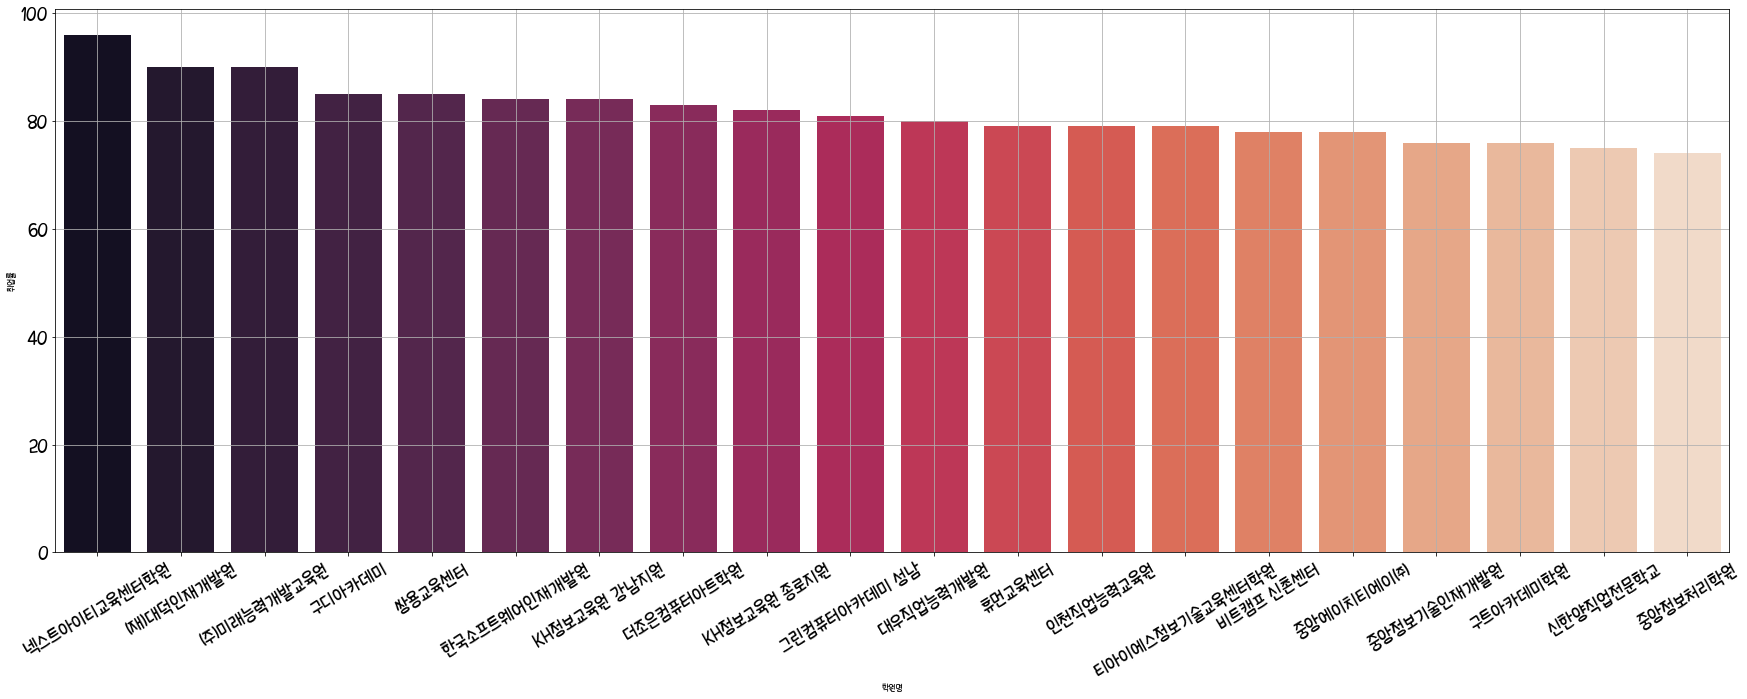

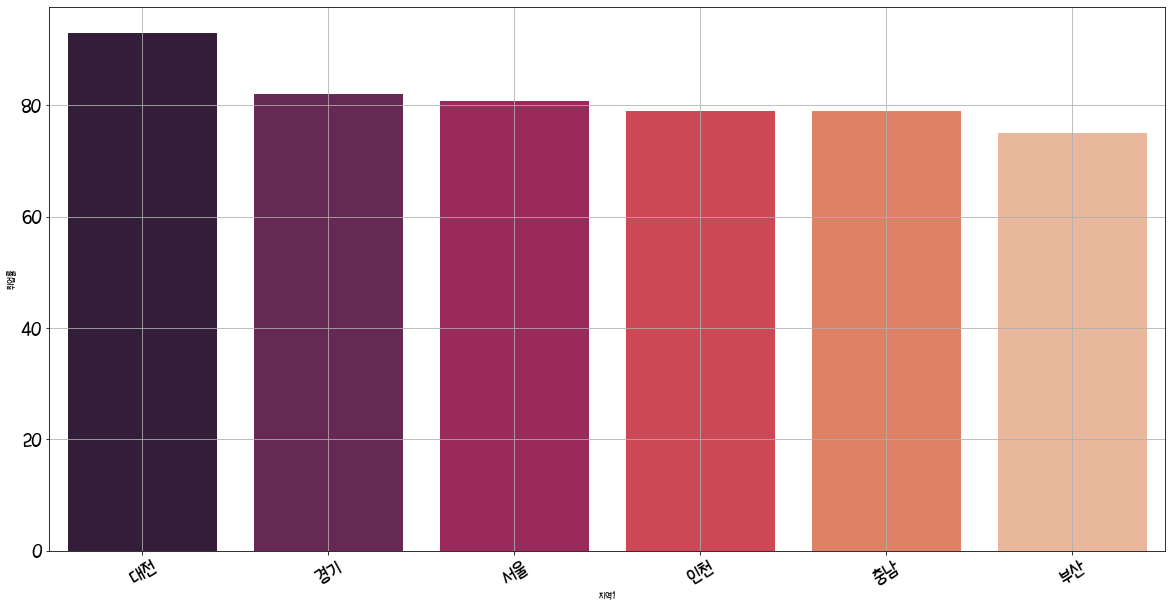

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
a = df['연령대'] >= 20
df_20 = df[a]
b = df_20['연령대'] < 30
df20 = df_20[b]
# 전처리
df_sw = df20.loc[:,['NCS','취업률','과정','정원','기간','훈련비','연령대','학원명','지역1']]
df_sw.dropna(inplace=True)
grouped = df_sw.groupby(['학원명', '과정', '지역1'])
df_sw = round(grouped.mean(),0).astype(int)
df_sw = df_sw.reset_index(level=['과정','지역1'])

df_sw.sort_values(by='취업률',ascending=False , inplace=True)
big = df_sw['과정'] == '응용SW개발자'
df_sw = df_sw[big]
display(df_sw)
df_sw = df_sw.head(20)

grouped = df_sw.groupby(['지역1', '과정'])
df_a = grouped.mean()
df_a = df_a.reset_index(level=['과정'])

df_a.sort_values(by='취업률',ascending=False , inplace=True)
big = df_a['과정'] == '응용SW개발자'
df_a = df_a[big]
display(df_a)
df_a = df_a.head(20)

# 그래프 그리기
fig = plt.figure(figsize=(30, 10))
ax1 = fig.add_subplot(1, 1, 1)
sns.barplot(x=df_sw.index, y="취업률", data=df_sw, palette="rocket", ax=ax1)
plt.xticks(size=20, rotation=30)
plt.yticks(size=20)
plt.grid(True)

# plt.savefig('output/빅데이터_일일훈련비_top14.png')
# 출력 
plt.show()

# 그래프 그리기
fig = plt.figure(figsize=(20, 10))
ax1 = fig.add_subplot(1, 1, 1)
sns.barplot(x=df_a.index, y="취업률", data=df_a, palette="rocket", ax=ax1)
plt.xticks(size=20, rotation=30)
plt.yticks(size=20)
plt.grid(True)

# plt.savefig('output/빅데이터_일일훈련비_top14.png')
# 출력 
plt.show()